**Data Governance, Privacy, and Quality Management of Synthetic Saudi Civil Data**
---------------------------------------------------------------------------------------------------
Project Description:

The project focuses on implementing data governance practices using a synthetic dataset of Saudi civilian information. The dataset contains personal-like attributes such as Name, Age, Phone Number, Email, Date of Birth, City, Country, National ID, Credit Card Number, and Bank Account. The aim is to demonstrate governance over all key data domains, ensuring data privacy, quality, and proper management without using real personal data.



*   Data Privacy & Security

Ensure sensitive data (e.g., National ID, Bank Account, Credit Card) is handled safely.

Demonstrate masking, anonymization, or encryption techniques.

Comply with PDPL (Personal Data Protection Law, Saudi Arabia) and local data privacy standards.

*   Master Data Management (MDM)

Establish a single source of truth for core entities (e.g., individuals, contact info).

Identify duplicates and consolidate records for consistency.

Standardize data formats (e.g., phone numbers, emails, dates).

* Data Quality Management

Check for completeness, accuracy, and consistency.

Detect missing, invalid, or outlier values (e.g., ages outside 18–70).

Apply validation rules and data cleansing processes.

*  Data Lifecycle Management

Manage data from creation, storage, usage, to deletion.

Implement retention policies for synthetic or test data.

Ensure proper archiving and disposal practices.



*   Metadata Management

Document each field (e.g., Name = string, Age = integer, Phone = string).

Track data sources, definitions, and lineage for auditability.



*   Data Governance Policies & Roles

Define ownership and stewardship for data domains.

Assign roles for monitoring quality, privacy, and compliance.








In [2]:
!pip install Faker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.3 MB/s eta 0:00:00


# THE CODE FOR FAKE DATA

In [3]:
import pandas as pd
import random
from faker import Faker

# Initialize Faker
fake = Faker("ar_SA")  # Arabic names (will be transliterated automatically)

# Saudi cities (English transliteration)
cities = ["Riyadh", "Jeddah", "Mecca", "Medina", "Dammam", "Khobar", "Abha", "Tabuk", "Qassim", "Hail"]

# Function to randomly introduce missing or wrong data
def maybe_missing(value, missing_prob=0.05):
    return None if random.random() < missing_prob else value

def maybe_wrong_phone(phone):
    if random.random() < 0.05:  # 5% wrong format
        return f"{random.randint(1000000, 9999999)}"  # missing +9665
    return phone

def maybe_wrong_age(age):
    if random.random() < 0.05:  # 5% unrealistic age
        return random.randint(0, 120)
    return age

# Generate dataset with Arabic names (transliterated)
data = []
for i in range(1, 101):
    first_name = maybe_missing(fake.first_name())
    last_name = maybe_missing(fake.last_name())
    name = f"{first_name} {last_name}" if first_name and last_name else None

    age = maybe_missing(maybe_wrong_age(random.randint(18, 70)))
    phone = maybe_missing(maybe_wrong_phone(f"+9665{random.randint(10000000, 99999999)}"))
    email = maybe_missing(f"user{i}@example.sa")
    dob = maybe_missing(fake.date_of_birth(minimum_age=18, maximum_age=70))
    city = maybe_missing(random.choice(cities))
    country = "Saudi Arabia"
    national_id = maybe_missing(f"{random.randint(1000000000, 9999999999)}")
    credit_card = maybe_missing(fake.credit_card_number(card_type="mastercard"))
    bank_account = maybe_missing("SA" + "".join([str(random.randint(0, 9)) for _ in range(22)]))

    data.append([i, name, age, phone, email, dob, city, country, national_id, credit_card, bank_account])

# Create DataFrame
columns = ["ID", "Name", "Age", "Phone Number", "Email", "Date of Birth",
           "City", "Country", "National ID", "Credit Card Number", "Bank Account"]
df = pd.DataFrame(data, columns=columns)

# Display all rows
pd.set_option('display.max_rows', None)
print(df)

# Save to CSV
df.to_csv("saudi_civil_transliterated_dirty.csv", index=False, encoding="utf-8-sig")


     ID                          Name    Age   Phone Number  \
0     1    معن آل محمد بن علي بن جماز   18.0  +966567941673   
1     2                  باهرة الحجار   58.0  +966555426055   
2     3                سراج أبو داوود   26.0  +966558349450   
3     4  فيّاض آل محمد بن علي بن جماز   66.0  +966576385743   
4     5                علي آل بن ظافر   67.0  +966552624379   
5     6                   عذب آل عواض   32.0  +966533070610   
6     7                  معزّ آل سعود   28.0           None   
7     8                          None   69.0  +966547111308   
8     9                          None   66.0           None   
9    10               وثّاب أبا الخيل   42.0  +966528786390   
10   11             عبد الباري الراشد   29.0  +966517588186   
11   12                 مسرور آل عواض   56.0  +966525108133   
12   13                  حسام آل مقطة   64.0  +966583863552   
13   14                   تميم الحجار   36.0  +966583691280   
14   15                   رشدي حنبولي   31.0  +96659461

In [4]:
print(df.head())

   ID                          Name   Age   Phone Number             Email  \
0   1    معن آل محمد بن علي بن جماز  18.0  +966567941673  user1@example.sa   
1   2                  باهرة الحجار  58.0  +966555426055  user2@example.sa   
2   3                سراج أبو داوود  26.0  +966558349450  user3@example.sa   
3   4  فيّاض آل محمد بن علي بن جماز  66.0  +966576385743  user4@example.sa   
4   5                علي آل بن ظافر  67.0  +966552624379  user5@example.sa   

  Date of Birth    City       Country National ID Credit Card Number  \
0          None    Hail  Saudi Arabia  9722741497   5309398088950196   
1    1968-11-21    Hail  Saudi Arabia  8371357526   2720049540476498   
2    1968-06-04  Jeddah  Saudi Arabia  9673237629   5346331517988540   
3    1987-03-05   Mecca  Saudi Arabia  8665275899   2225517726287855   
4    1984-08-24  Dammam  Saudi Arabia  8855227561   2282027006701286   

               Bank Account  
0  SA4976407785945350773278  
1  SA2715940611369088827398  
2  SA617

# Data Quality Management
# Check for completeness, accuracy, and consistency.

# Detect missing, invalid, or outlier values (e.g., ages outside 18–70).

# Apply validation rules and data cleansing processes.

In [5]:
import pandas as pd

# Load your dataset
df = pd.read_csv("saudi_civil_transliterated_dirty.csv")

# Display basic information
print("=== Dataset Info ===")
print(df.info())

# Display first 5 rows
print("\n=== Sample Data ===")
print(df.head())

# Display summary statistics for numeric columns
print("\n=== Numeric Summary ===")
print(df.describe())

# --------------------------
# 1. Check for duplicate rows
# --------------------------
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")
if len(duplicate_rows) > 0:
    print(duplicate_rows)


# --------------------------
# 2. Check completeness (missing values)
# --------------------------
print("=== Missing Values per Column ===")
missing_values = df.isnull().sum()
print(missing_values)

# --------------------------
# 3. Check accuracy and validity
# --------------------------
# Age: should be 18-70
invalid_age = df[(df["Age"] < 18) | (df["Age"] > 70)]
print(f"\nInvalid ages (outside 18-70): {len(invalid_age)}")
if len(invalid_age) > 0:
    print(invalid_age[["ID","Name","Age"]])

# Email: simple validation
invalid_email = df[~df["Email"].astype(str).str.match(r'^[\w\.-]+@[\w\.-]+\.\w+$')]
print(f"\nInvalid emails: {len(invalid_email)}")
if len(invalid_email) > 0:
    print(invalid_email[["ID","Name","Email"]])

# --------------------------
# 4. Check uniqueness for key columns
# --------------------------
key_columns = ["National ID", "Phone Number", "Email"]
for col in key_columns:
    unique_count = df[col].nunique()
    total_count = len(df)
    print(f"\nUniqueness check for {col}: {unique_count}/{total_count} unique values")


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  100 non-null    int64  
 1   Name                93 non-null     object 
 2   Age                 97 non-null     float64
 3   Phone Number        95 non-null     float64
 4   Email               98 non-null     object 
 5   Date of Birth       96 non-null     object 
 6   City                94 non-null     object 
 7   Country             100 non-null    object 
 8   National ID         97 non-null     float64
 9   Credit Card Number  97 non-null     float64
 10  Bank Account        98 non-null     object 
dtypes: float64(4), int64(1), object(6)
memory usage: 8.7+ KB
None

=== Sample Data ===
   ID                          Name   Age  Phone Number             Email  \
0   1    معن آل محمد بن علي بن جماز  18.0  9.665679e+11  user1@example.sa

# Data Privacy & Security
# Ensure sensitive data (e.g., National ID, Bank Account, Credit Card) is handled safely.

# Demonstrate masking, anonymization, or encryption techniques.

# Comply with PDPL (Personal Data Protection Law, Saudi Arabia) and local data privacy standards.

In [6]:
import pandas as pd
from cryptography.fernet import Fernet

# Load dataset
df = pd.read_csv("saudi_civil_transliterated_dirty.csv")

# --------------------------
# 1. Masking sensitive data
# --------------------------
# Mask National ID: show only last 4 digits
df["National ID Masked"] = df["National ID"].astype(str).apply(lambda x: "***-***-***-" + x[-1] if pd.notnull(x) else None)

# Mask Credit Card: show only last 4 digits
df["Credit Card Masked"] = df["Credit Card Number"].astype(str).apply(lambda x: "**** **** **** " + x[-4:] if pd.notnull(x) else None)

# Mask Bank Account: show only last 4 digits
df["Bank Account Masked"] = df["Bank Account"].astype(str).apply(lambda x: "****" + x[-4:] if pd.notnull(x) else None)

# --------------------------
# 2. Anonymization (replace names/emails)
# --------------------------
df["Name Anonymized"] = df.index.map(lambda x: f"User_{x+1}")
df["Email Anonymized"] = df.index.map(lambda x: f"user{x+1}@example.sa")

# --------------------------
# 3. Optional: Encryption of sensitive data
# --------------------------
# Generate a key (keep it safe!)
key = Fernet.generate_key()
cipher = Fernet(key)

# Encrypt National ID (example)
df["National ID Encrypted"] = df["National ID"].astype(str).apply(lambda x: cipher.encrypt(x.encode()).decode() if pd.notnull(x) else None)

# Encrypt Bank Account
df["Bank Account Encrypted"] = df["Bank Account"].astype(str).apply(lambda x: cipher.encrypt(x.encode()).decode() if pd.notnull(x) else None)

# Encrypt Credit Card
df["Credit Card Encrypted"] = df["Credit Card Number"].astype(str).apply(lambda x: cipher.encrypt(x.encode()).decode() if pd.notnull(x) else None)

# --------------------------
# Save masked/anonymized dataset
# --------------------------
df.to_csv("saudi_civil_transliterated_privacy.csv", index=False, encoding="utf-8-sig")

print("Privacy measures applied: masking, anonymization, and optional encryption.")


Privacy measures applied: masking, anonymization, and optional encryption.


In [7]:
print(df["National ID Masked"].head(10))

print(df["Credit Card Encrypted"].head(10))

print(df["Name Anonymized"].head(10))

0    ***-***-***-0
1    ***-***-***-0
2    ***-***-***-0
3    ***-***-***-0
4    ***-***-***-0
5    ***-***-***-0
6    ***-***-***-0
7    ***-***-***-0
8    ***-***-***-0
9    ***-***-***-0
Name: National ID Masked, dtype: object
0    gAAAAABovk4rsGk0kfqDAEreZxUMXZ6Deb9AMwis6TByJ1...
1    gAAAAABovk4rPIuh3a8HsLHbdjkgW9XP4SAdyvi7MobGhF...
2    gAAAAABovk4rL1N79EzyfcXfevFkdeYOa2CVzaFSUuI0MC...
3    gAAAAABovk4rMRGF33GIxgcYI8erNCTo5maajxJJhP8FV3...
4    gAAAAABovk4rAw1I2tEQzUzx7jYsxc6ZS8P_-qoqL2HdF-...
5    gAAAAABovk4reoZr3efK7wj4YJ9tt46SXAIF0TiMMvaq0c...
6    gAAAAABovk4riYYv9PBafWa3JxtMHTE_a2cLd52yzOT0pr...
7    gAAAAABovk4rjbt0svEKOzOpIaG_xjP-KKkUq1kcsaCoKU...
8    gAAAAABovk4rkxaZuPuoWjILKaSTvS7hVNrEZc9ojUwWpS...
9    gAAAAABovk4rmWd2ZppjLKDUkOj4bPCS8fuSyFHB75XA4j...
Name: Credit Card Encrypted, dtype: object
0     User_1
1     User_2
2     User_3
3     User_4
4     User_5
5     User_6
6     User_7
7     User_8
8     User_9
9    User_10
Name: Name Anonymized, dtype: object


# Master Data Management (MDM)
# Establish a single source of truth for core entities (e.g., individuals, contact info).

# Identify duplicates and consolidate records for consistency.


# Standardize data formats (e.g., phone numbers, emails, dates).

In data management, there are 3 common categories of data you’ll hear:

1️⃣ Master Data

Core business entities that rarely change.
👉 Example: Customer, Employee, Product, Supplier.

Columns: Name, National ID, Phone, Email, DOB, etc.

2️⃣ Reference Data

Controlled values that describe or classify data.
👉 Example: Lists, codes, categories, lookup tables.

Examples:

Country codes (SA, US, UK)

Currency codes (SAR, USD, EUR)

Gender (Male, Female, Other)

Status (Active, Inactive, Pending)

⚡ Reference data helps keep master data consistent.
For example, instead of typing “Saudi Arabia” 10 different ways, you store a reference list of country codes and use it everywhere.

3️⃣ Transactional Data

Day-to-day business activity records.
👉 Example: Sales orders, Payments, Service requests.

In [10]:
import pandas as pd

# Load your dataset
df = pd.read_csv("saudi_civil_transliterated_dirty.csv")

# Define Master Data and Reference Data columns
master_data_columns = [
    "ID", "Name", "Age", "Phone Number", "Email",
    "Date of Birth", "National ID", "Credit Card Number", "Bank Account"
]

reference_data_columns = [
    "City", "Country"
]

# Extract them
master_data = df[master_data_columns]
reference_data = df[reference_data_columns]

# Show results
print("📌 Master Data (Core identifying info):")
print(master_data.head())

print("\n📌 Reference Data (Standardized categories):")
print(reference_data.head())

# Save as separate CSV files
master_data.to_csv("master_data.csv", index=False, encoding="utf-8-sig")
reference_data.to_csv("reference_data.csv", index=False, encoding="utf-8-sig")





📌 Master Data (Core identifying info):
   ID                          Name   Age  Phone Number             Email  \
0   1    معن آل محمد بن علي بن جماز  18.0  9.665679e+11  user1@example.sa   
1   2                  باهرة الحجار  58.0  9.665554e+11  user2@example.sa   
2   3                سراج أبو داوود  26.0  9.665583e+11  user3@example.sa   
3   4  فيّاض آل محمد بن علي بن جماز  66.0  9.665764e+11  user4@example.sa   
4   5                علي آل بن ظافر  67.0  9.665526e+11  user5@example.sa   

  Date of Birth   National ID  Credit Card Number              Bank Account  
0           NaN  9.722741e+09        5.309398e+15  SA4976407785945350773278  
1    1968-11-21  8.371358e+09        2.720050e+15  SA2715940611369088827398  
2    1968-06-04  9.673238e+09        5.346332e+15  SA6174275311401459114808  
3    1987-03-05  8.665276e+09        2.225518e+15  SA9026882004260302525529  
4    1984-08-24  8.855228e+09        2.282027e+15  SA4421991328858093386931  

📌 Reference Data (Standardize

🟩 Reference Data

(Standardized and controlled values, often from code lists or external sources)

City → Comes from a fixed list (["Riyadh", "Jeddah", ...]).

Country → Always Saudi Arabia (static, controlled value).

✅ So in summary:

Master Data (Who the person is): ID, Name, Age, Phone Number, Email, Date of Birth, National ID, Credit Card Number, Bank Account.

Reference Data (Standard categories): City, Country.

Metadata Management
Document each field (e.g., Name = string, Age = integer, Phone = string).

Track data sources, definitions, and lineage for auditability

In [11]:
import pandas as pd

# Define metadata for your dataset
metadata = [
    {"Column": "ID", "Type": "Integer", "Description": "Unique identifier for each record", "Source": "Generated sequence", "Lineage": "Assigned in data generation loop"},
    {"Column": "Name", "Type": "String", "Description": "Full name of the individual (Arabic transliterated)", "Source": "Faker (ar_SA)", "Lineage": "Generated using faker first and last name"},
    {"Column": "Age", "Type": "Integer", "Description": "Age of the individual", "Source": "Random number (18–70)", "Lineage": "Generated randomly with some injected errors"},
    {"Column": "Phone Number", "Type": "String", "Description": "Contact phone number", "Source": "Faker/random", "Lineage": "Generated with +966 prefix, sometimes wrong"},
    {"Column": "Email", "Type": "String", "Description": "Email address", "Source": "Generated pattern (userX@example.sa)", "Lineage": "Formatted during data generation"},
    {"Column": "Date of Birth", "Type": "Date", "Description": "Individual’s date of birth", "Source": "Faker date_of_birth", "Lineage": "Generated based on age rules"},
    {"Column": "City", "Type": "String", "Description": "City of residence", "Source": "Predefined list of Saudi cities", "Lineage": "Randomly chosen from fixed list"},
    {"Column": "Country", "Type": "String", "Description": "Country of residence", "Source": "Static value", "Lineage": "Always set to Saudi Arabia"},
    {"Column": "National ID", "Type": "String", "Description": "Unique 10-digit national ID", "Source": "Random 10-digit number", "Lineage": "Generated randomly"},
    {"Column": "Credit Card Number", "Type": "String", "Description": "Fake Mastercard number", "Source": "Faker credit_card_number", "Lineage": "Generated using Faker"},
    {"Column": "Bank Account", "Type": "String", "Description": "IBAN-style account number", "Source": "Random digits prefixed with SA", "Lineage": "Generated during data creation"}
]

# Create DataFrame for metadata
metadata_df = pd.DataFrame(metadata)

# Show metadata
print("📌 Metadata Documentation:")
print(metadata_df)

# Save as CSV
metadata_df.to_csv("metadata_documentation.csv", index=False, encoding="utf-8-sig")


📌 Metadata Documentation:
                Column     Type  \
0                   ID  Integer   
1                 Name   String   
2                  Age  Integer   
3         Phone Number   String   
4                Email   String   
5        Date of Birth     Date   
6                 City   String   
7              Country   String   
8          National ID   String   
9   Credit Card Number   String   
10        Bank Account   String   

                                          Description  \
0                   Unique identifier for each record   
1   Full name of the individual (Arabic transliter...   
2                               Age of the individual   
3                                Contact phone number   
4                                       Email address   
5                          Individual’s date of birth   
6                                   City of residence   
7                                Country of residence   
8                         Unique 10-digi

# Data Lifecycle Management
# Manage data from creation, storage, usage, to deletion.

# Implement retention policies for synthetic or test data.

# Ensure proper archiving and disposal practices.

1️⃣ Data Creation

Example: National ID, Name, Age, Phone Number, Email, Date of Birth, Bank Account, Credit Card.

PDPL Compliance:

Collect only data necessary for the purpose (data minimization).

Ensure individuals are informed if their data is collected (transparency principle).

Obtain explicit consent if required for sensitive data like National ID or financial info.

2️⃣ Data Storage

Example: Storing citizen data in a database or CSV.

PDPL Compliance:

Store securely using encryption at rest.

Implement access controls so only authorized staff can access the data.

Maintain integrity: prevent unauthorized modification.

3️⃣ Data Usage

Example: Using citizen data for Master Data Management, analytics, or government services.

PDPL Compliance:

Use data only for the purpose it was collected (e.g., verifying identity, providing services).

Mask or anonymize sensitive fields like National ID, bank account, and credit card numbers when sharing internally or externally.

Monitor usage and access logs for accountability.

4️⃣ Data Archiving

Example: Old citizen records not actively used but kept for regulatory or historical purposes.

PDPL Compliance:

Retain only for the period required by law or business purpose.

Protect archived data with encryption and access restrictions.

Document retention policies for audit purposes.

5️⃣ Data Deletion / Disposal

Example: Deleting citizen records after they are no longer needed or past retention period.

PDPL Compliance:

Permanently delete records using secure methods (e.g., database purge, file shredding).

Ensure sensitive personal data (National ID, bank account, credit card) cannot be reconstructed.

Document deletion actions for compliance audits.
 ✅ Key Takeaways:

Treat all citizen data as highly sensitive, even if used for analytics.

Follow PDPL principles: minimization, security, purpose limitation, retention, and secure disposal.

Document every step in the lifecycle for auditability.   



Reference:

 The information provided regarding Data Lifecycle Management in compliance with Saudi Arabia's Personal Data Protection Law (PDPL) is based on the official text of the PDPL and its implementing regulations. For detailed reference and to ensure full compliance, you can consult the official documents:
[Personal Data Protection Law (PDPL)](https://sdaia.gov.sa/ar/SDAIA/about/Documents/Personal%20Data%20Arabic%20V2-23April2023-%20Reviewed-.pdf)

[Data Management and Personal Data Protection Standards](https://sdaia.gov.sa/ar/SDAIA/about/Pages/RegulationsAndPolicies.aspx)

 – PDF Document

These documents outline the principles and obligations related to data creation, storage, usage, archiving, and deletion, ensuring the protection of personal data in Saudi Arabia.



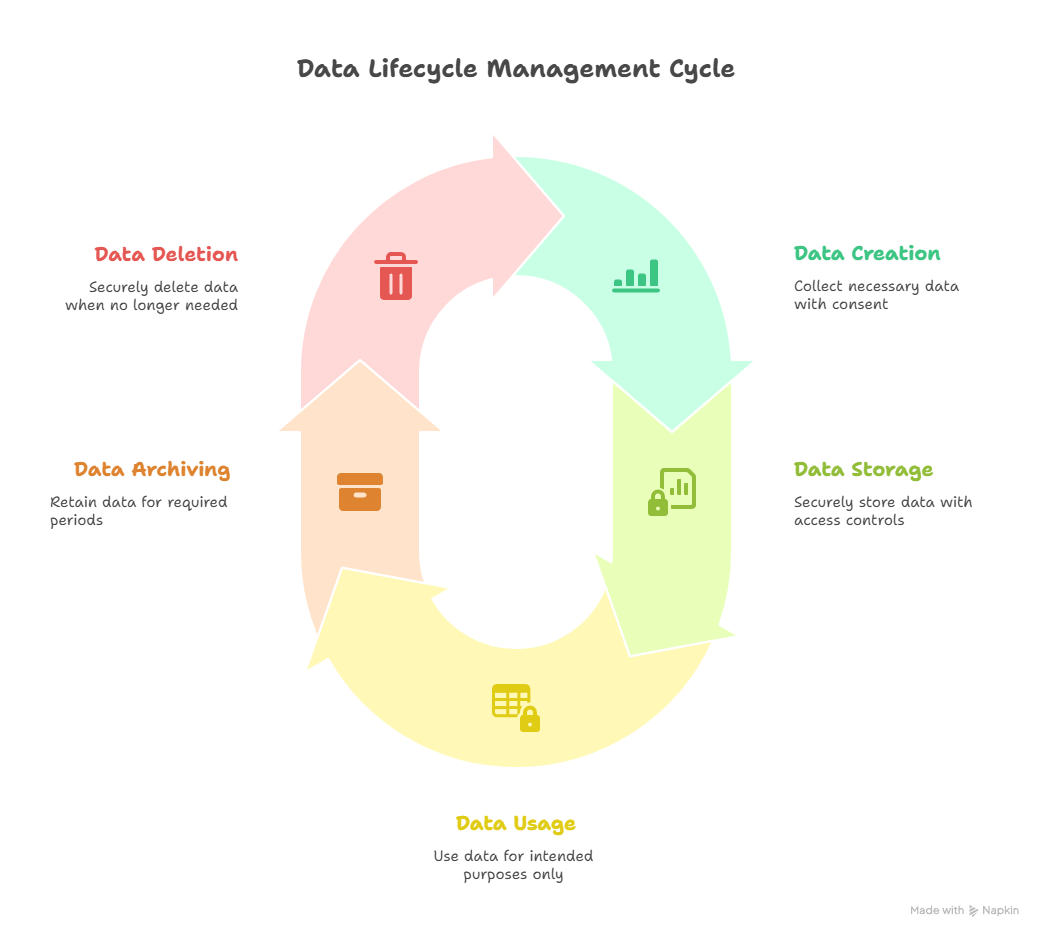

# Data Governance Policies & Roles
# Define ownership and stewardship for data domains.

# Assign roles for monitoring quality, privacy, and compliance.

Data Governance Policies & Roles under PDPL

1️⃣ Data Ownership & Stewardship

Definition:

Data Owner: The person or department responsible for a specific data domain (e.g., citizen personal info, financial info).

Data Steward: The person responsible for ensuring the data is accurate, complete, and compliant with policies.

PDPL Alignment:

Data owners must ensure collection and use of personal data comply with PDPL.

Stewards monitor adherence to privacy, retention, and security rules.

2️⃣ Roles & Responsibilities

Chief Data Officer (CDO) / Data Governance Lead:

Oversees all data governance policies.

Ensures alignment with PDPL and regulatory requirements.

Data Owners:

Approve collection and usage of data in their domain.

Ensure sensitive data (e.g., National ID, bank account, credit card) is protected.

Data Stewards:

Validate data quality, completeness, and accuracy.

Monitor for duplicate, outdated, or incorrect records.

Apply masking, anonymization, or encryption as required by PDPL.

Data Privacy Officer (DPO):

Ensures compliance with PDPL privacy principles.

Handles data subject requests (access, correction, deletion).

IT & Security Teams:

Implement encryption, access controls, and monitoring to protect sensitive personal data.

3️⃣ Policies & Procedures

Data Quality Policy:

Establish procedures to detect duplicates, missing values, outliers, and incorrect formats.

Data Privacy & Protection Policy:

Mask or anonymize sensitive information when shared.

Restrict access based on roles.

Ensure all data processing complies with PDPL.

Data Compliance Monitoring:

Regular audits of data usage, retention, and deletion practices.

Document actions for accountability.

Reference:

 The information provided regarding Data Governance Policies and Roles in compliance with Saudi Arabia’s Personal Data Protection Law (PDPL) is based on the official text of the PDPL and its implementing regulations. For detailed reference and to ensure full compliance, you can consult the official documents:
[Personal Data Protection Law (PDPL)](https://sdaia.gov.sa/ar/SDAIA/about/Documents/Personal%20Data%20Arabic%20V2-23April2023-%20Reviewed-.pdf)

[Data Management and Personal Data Protection Standards](https://sdaia.gov.sa/ar/SDAIA/about/Pages/RegulationsAndPolicies.aspx)


These documents outline the principles and obligations related to data ownership, stewardship, quality monitoring, privacy, and compliance, ensuring the protection of personal data in Saudi Arabia.

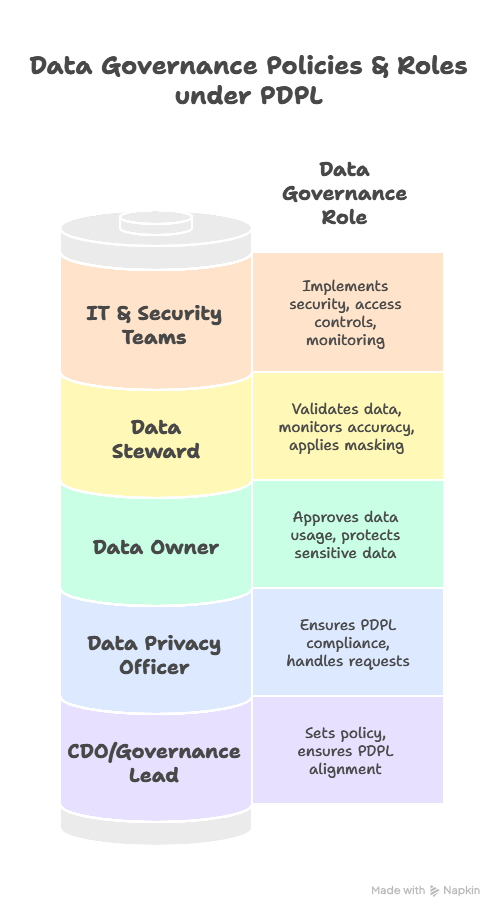